## Import The Libraries 

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## Download The Data

In [366]:
data = pd.read_csv('Downloads\\flipkart\\flipkart.csv')
data

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


# Discover The Data

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


### No Duplicated Data

In [368]:
data.duplicated().sum()

0

### The Rates [1, 2, 3, 4, 5]

In [369]:
data["Rating"].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [370]:
#data["Product_name"].unique()

### Number of Unique Products 231 product

In [371]:
len(data["Product_name"].unique())

231

## There are 32 Brand in the data

In [372]:
brand = []
i = 0

for prod in data["Product_name"]:
    brand.append(prod.split()[0])
    data.loc[i, 'Brand'] = prod.split()[0]
    i = i + 1
    
pd.Series(brand).unique()

array(['Lenovo', 'DELL', 'ASUS', 'HP', 'RedmiBook', 'acer', 'APPLE',
       'realme', 'LAVA', 'POCO', 'Infinix', 'SAMSUNG', 'LG', 'Whirlpool',
       'Godrej', 'Haier', 'Vu', 'Mi', 'OnePlus', 'Coocaa', 'MOTOROLA',
       'Xiaomi', 'Redmi', 'REDMI', 'Candes', 'Thomson', 'IFB', 'Lloyd',
       'ONIDA', 'ZEBRONICS', 'BenQ', 'MSI'], dtype=object)

In [373]:
len(pd.Series(brand).unique())

32

In [374]:
data = data.drop(columns = ["Unnamed: 0"])

In [375]:
data

,Product_name,Review,Rating,Brand
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Lenovo
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,Lenovo
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Lenovo
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,DELL
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,DELL
...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5,MSI
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5,MSI
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5,MSI
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5,MSI


# Clean The Data

In [377]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string

def clean_Data(data):
    # remove any retweet tags (starting with "RT") from the beginning of the data string
    data2 = re.sub(r'^RT[\s]+', '', data)
    
    # removes any words starting with a dollar sign ($)
    data2 = re.sub(r'\$\w*', '', data2)
    
    # removes HTML tags
    data2 = re.sub('<[^>]*>', '', data2)
    
    # removes single characters surrounded by spaces
    data2 = re.sub(r'\s+[a-zA-Z]\s+', '', data2)
    
    # removes URLs
    data2 = re.sub(r'https?:\/\/.*[\r\n]*', '', data2)
    
    # removes #
    data2 = re.sub(r'\#', '', data2)
    
    # removes numvers
    data2 = re.sub(r'[0-9]', '', data2)

    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',data2)
    text = re.sub('[\W]+', ' ', data2.lower()) + ' '.join(emojis).replace('-','')

    stemmer = PorterStemmer()
    stop = stopwords.words('english')

    text = [word for word in text.split(' ') if word not in stop]
    text = [word for word in text if word not in string.punctuation]
    text = [word for word in text if word not in ("k", "nan", "phone", "tv", "product", "camera", "laptop", "mobil", "flipkart", "samsung")]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)

    return text

In [378]:
data['cleanData'] = data['Review'].apply(clean_Data)

In [379]:
data 

,Product_name,Review,Rating,Brand,cleanData
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Lenovo,best great performancei got around batteri bac...
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,Lenovo,good perfom
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Lenovo,great perform usual also game issu batteri sta...
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,DELL,wife happi best
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,DELL,light weight new amaz featur batteri life awesom
...,...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5,MSI,great display accur colour price rang
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5,MSI,superb monitor first brought use month bought ...
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5,MSI,awesom
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5,MSI,one issu adapt


In [380]:
data['cleanData'][150]

'isreal good price worth money boot time fast sec processor power th gener maximum batteri backup hour con ip display'

# Visualize The words

In [381]:
data['Rating'].value_counts()

5    1382
4     552
1     184
3     140
2      46
Name: Rating, dtype: int64

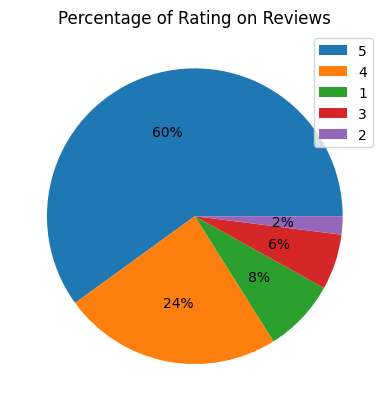

In [382]:
plt.pie(data['Rating'].value_counts(), autopct='%1.0f%%')
plt.title('Percentage of Rating on Reviews')
plt.legend(data['Rating'].value_counts().index)
plt.show()

In [383]:
def make_Classify(rate):
    if (rate >= 3):
        return 1 #Positive
    else:
        return 0 #Netagive

data['Classify'] = data['Rating'].apply(make_Classify)
data

,Product_name,Review,Rating,Brand,cleanData,Classify
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Lenovo,best great performancei got around batteri bac...,1
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,Lenovo,good perfom,1
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Lenovo,great perform usual also game issu batteri sta...,1
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,DELL,wife happi best,1
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,DELL,light weight new amaz featur batteri life awesom,1
...,...,...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5,MSI,great display accur colour price rang,1
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5,MSI,superb monitor first brought use month bought ...,1
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5,MSI,awesom,1
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5,MSI,one issu adapt,1


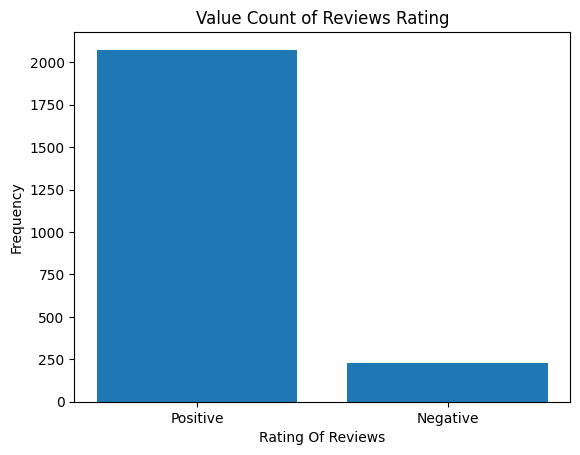

('Positive', 'Negative')
[2074, 230]


In [384]:
freqs = [data['Rating'].where(data['Classify'] == 1).count(),
         data['Rating'].where(data['Classify'] == 0).count()]

bars = ('Positive', 'Negative')
pos = np.arange(len(bars))

plt.bar(pos, freqs)

plt.xticks(pos, bars)

plt.title('Value Count of Reviews Rating')

plt.xlabel('Rating Of Reviews')
plt.ylabel('Frequency')

plt.show()

print(bars)
print(freqs)

In [385]:
text = " ".join(word for word in data['cleanData'])
len(text)

254903

In [386]:
stop = stopwords.words('english')

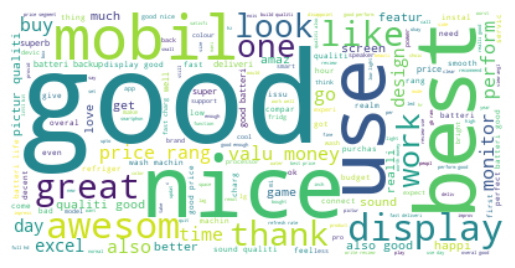

In [387]:
wc = WordCloud(stopwords=stop, background_color="white").generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [388]:
pos = " ".join(str(word) for word in data['cleanData'].where(data['Classify'] == 1))
neg = " ".join(str(word) for word in data['cleanData'].where(data['Classify'] == 0))

#### Positive Words

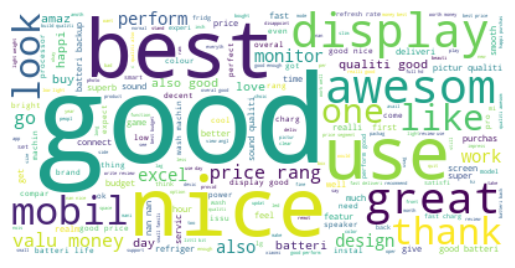

In [389]:
wc = WordCloud(stopwords=stop, background_color="white").generate(pos)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Negative Words

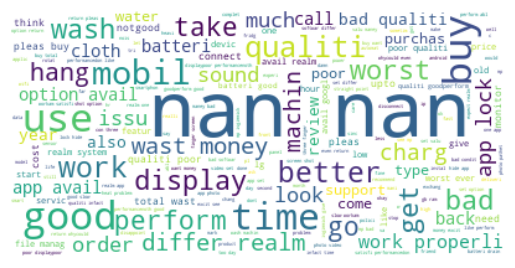

In [390]:
wc = WordCloud(stopwords=stop, background_color="white").generate(neg)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Prepare The Data

In [517]:
x = data['cleanData']
y = data['Classify']

In [518]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, test_size=0.25, shuffle=False)

In [519]:
x_train.shape

(1728,)

In [520]:
print(len(x_train))
print(len(x_test))

1728
576


In [521]:
import string

def process_data(data):
    tk = TweetTokenizer()
    stemmer = PorterStemmer()
    stemm_data = []
    
    tokens = tk.tokenize(data.lower())
    
    for word in tokens:
        if(word not in stop):
            if(word not in string.punctuation):
                temp = stemmer.stem(word)
                sumTemp = 0
                for let in temp:
                    sumTemp = ord(let) + sumTemp
                if(sumTemp > 256):
                    stemm_data.append(temp)
    final = " ".join(stemm_data)                
                    
    return final

In [522]:
x_train = x_train.apply(process_data)

In [523]:
x_train

0       best great performancei got around batteri bac...
1                                             good perfom
2       great perform usual also game issu batteri sta...
3                                         wife happi best
4        light weight new amaz featur batteri life awesom
                              ...                        
1723    good could better amol display fullhd lcd disp...
1724    love respon featureswould highlight face unloc...
1725    mobil good over design build nice feel good ho...
1726    great smooth good better perform smoothli heli...
1727    great item like colour awsom batteri long main...
Name: cleanData, Length: 1728, dtype: object

## Vectorize The Data

In [524]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(x_train)

X_train_cv.shape

(1728, 2771)

## Cross Validation

In [525]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

## Logistic Regression Model

In [526]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

cVal = cross_val_score(model, X_train_cv, y_train, cv = k_folds)

model.fit(X_train_cv, y_train)

X_test_cv = cv.transform(x_test)

predictions = model.predict(X_test_cv)

In [527]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predictions, y_test)
accuracy

0.9166666666666666

## Naive Bayes Model

In [528]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()

X_train_cv2 = X_train_cv.toarray()
X_test_cv2 = X_test_cv.toarray()

cVal = cross_val_score(model2, X_train_cv2, y_train, cv = k_folds)

model2.fit(X_train_cv2, y_train)

predictions = model2.predict(X_test_cv2)

In [529]:
accuracy2 = accuracy_score(predictions, y_test)
accuracy2

0.8003472222222222

## SVM Model

In [530]:
from sklearn import svm

model3 = svm.SVC()

cVal = cross_val_score(model3, X_train_cv, y_train, cv = k_folds)

model3.fit(X_train_cv, y_train)

SVC()

In [531]:
X_test_cv = cv.transform(x_test)

pred = model3.predict(X_test_cv)
accuracy3 = accuracy_score(pred, y_test)
accuracy3

0.8993055555555556

## Decision Tree Model

In [532]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2)

cVal = cross_val_score(model4, X_train_cv, y_train, cv = k_folds)

model4.fit(X_train_cv, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [533]:
pred = model4.predict(X_test_cv)
accuracy4 = accuracy_score(pred, y_test)
accuracy4

0.8975694444444444

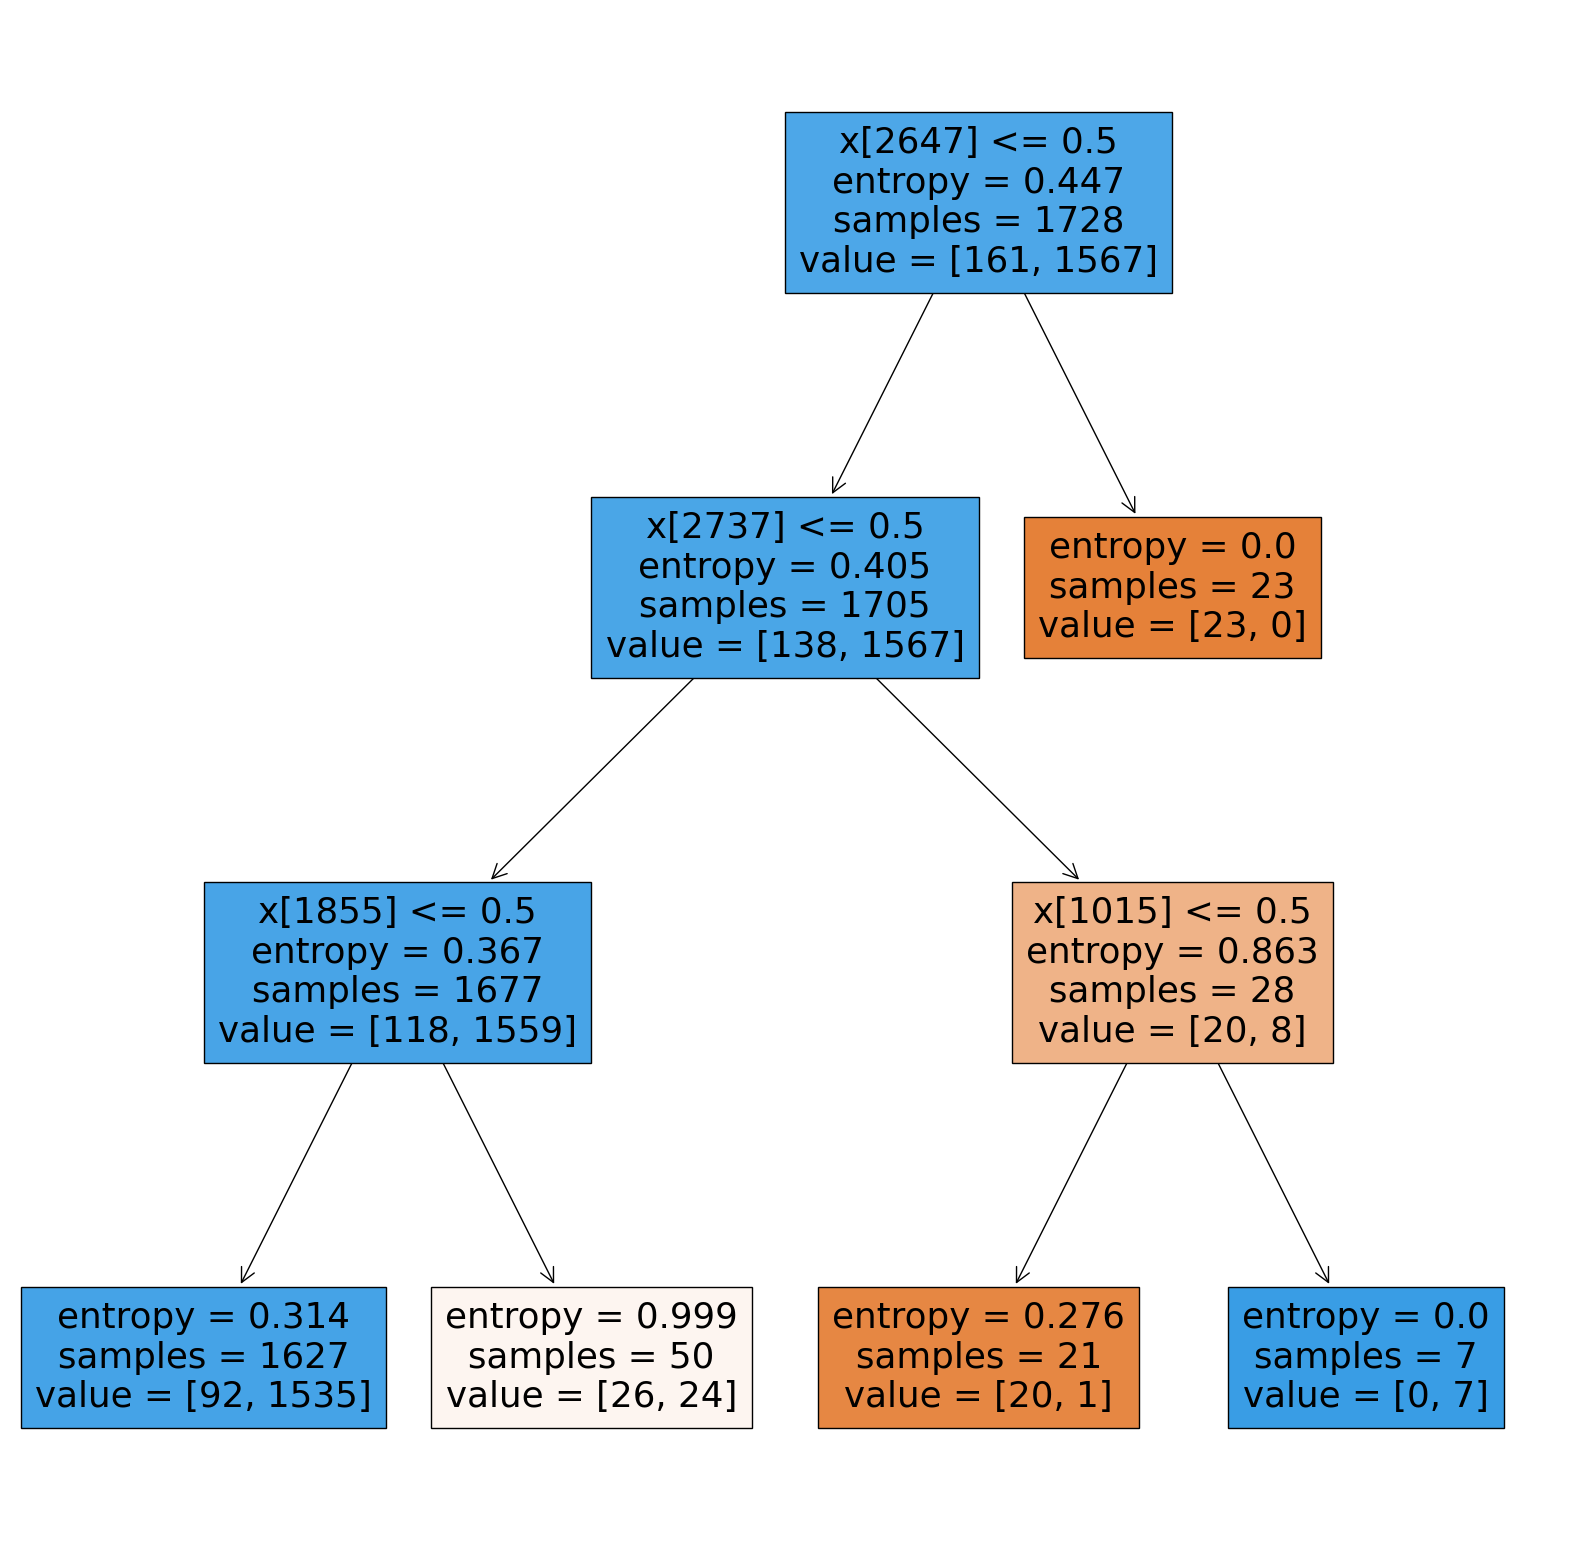

In [534]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model4, filled=True)

## KNN Model

In [535]:
from sklearn.neighbors import KNeighborsClassifier

model5 = KNeighborsClassifier(n_neighbors = 5)

cVal = cross_val_score(model5, X_train_cv, y_train, cv = k_folds)

model5.fit(X_train_cv, y_train)

KNeighborsClassifier()

In [536]:
pred = model5.predict(X_test_cv)
accuracy5 = accuracy_score(pred, y_test)
accuracy5

0.9131944444444444

## ANN Model

#### An MLP consists of multiple layers and each layer is fully connected to the following one.
#### The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. Between the input and the output layer there may be one or more nonlinear hidden layers.

In [537]:
from sklearn.neural_network import MLPClassifier

model6 = MLPClassifier(hidden_layer_sizes=(1,10,3), activation='logistic', solver='adam', max_iter=500)
model6.fit(X_train_cv,y_train)

c:\users\alaa\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(1, 10, 3),
              max_iter=500)

In [538]:
pred = model6.predict(X_test_cv)
accuracy6 = accuracy_score(pred, y_test)
accuracy6

0.9201388888888888

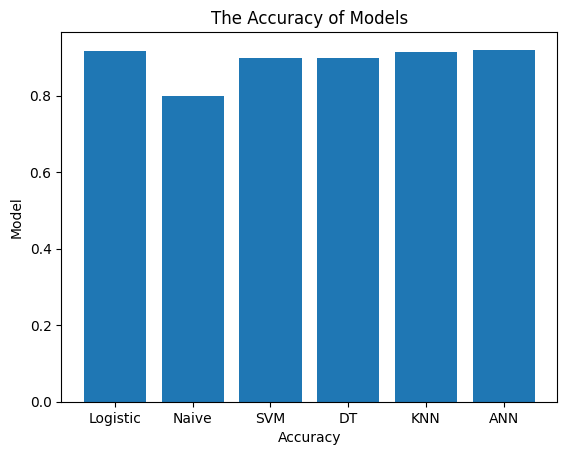

('Logistic', 'Naive', 'SVM', 'DT', 'KNN', 'ANN')
[0.9166666666666666, 0.8003472222222222, 0.8993055555555556, 0.8975694444444444, 0.9131944444444444, 0.9201388888888888]


In [539]:
freqs = [accuracy, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]

bars = ('Logistic', 'Naive', 'SVM', 'DT', 'KNN', 'ANN')
pos = np.arange(len(bars))

plt.bar(pos, freqs)

plt.xticks(pos, bars)

plt.title('The Accuracy of Models')

plt.xlabel('Accuracy')
plt.ylabel('Model')

plt.show()

print(bars)
print(freqs)